<a href="https://colab.research.google.com/github/visheshagrawal/IR2022_A3_96/blob/main/Q2_IR_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Loading the colab essentials

## Mounting Drive

In [ ]:
#Loading the colab essentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Target Directory

### Aditi Location

In [ ]:
%cd /content/drive/MyDrive/IR/HW3

/content/drive/MyDrive/IR/HW3


##Installing some library


##Loading the Important Library

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
# For missing values visualization
import missingno as msno
# For Plots
import matplotlib.pyplot as plt
import seaborn as sns
# For printing outputs in a beautiful way
from pprint import pprint
# For Normalization
from sklearn.preprocessing import MinMaxScaler
# For confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
# For cross validation
from sklearn.model_selection import cross_val_score
# For F_beta score
from sklearn.metrics import fbeta_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# For Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# For splitting the Data into test and train
from sklearn.model_selection import train_test_split
# For F-beta
from sklearn.metrics import fbeta_score, make_scorer
# for legends
import matplotlib.patches as mpatches
#os annd list dir
import os
#json file processsing
import json
#NLP processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
import networkx as nx
from networkx.drawing.layout import spring_layout

# Download relevant data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## MatplotLib Settings

In [ ]:
%matplotlib inline
plt.style.use('seaborn')
sns.set(style="whitegrid", color_codes=True)

In [ ]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Reading the dataset & forming the graph

In [ ]:
#G = nx.read_edgelist('/content/drive/MyDrive/IR/HW3/p2p-Gnutella09.txt', comments='#', delimiter='\t', create_using=nx.DiGraph)


In [ ]:
G = nx.read_edgelist('Wiki-Vote.txt', comments='#', delimiter='\t', create_using=nx.DiGraph)


In [ ]:
len(G)

7115

#Drawing the Network Nodes

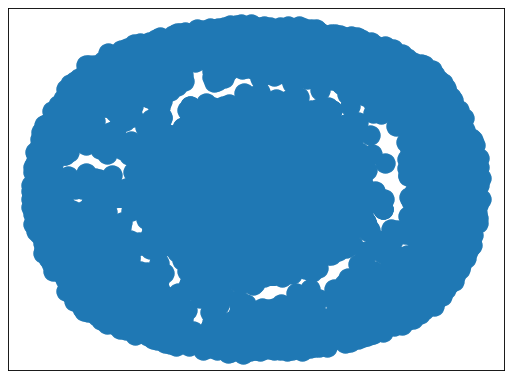

In [ ]:
#from matplotlib.pyplot import figure

#figure(figsize=(8, 6), dpi=80)

#nx.draw_networkx_nodes(G, spring_layout(G))


#Dic sort and print top10

In [ ]:
def sort_(dic_):
  return dict(sorted(dic_.items(), key=lambda item: item[1], reverse = True))
def print_10(dic_):
  for i in range(11):
    print("Node:{} score: {}".format(list(dic_.keys())[i],list(dic_.values())[i]))


#Page Rank

In [ ]:
page_ranks = nx.pagerank(G)

page_ranks_sorted=sort_(page_ranks)
print("===================================================page ranks===================================")
print(page_ranks_sorted)

===================================================page ranks===================================
{'4037': 0.004612715891167545, '15': 0.0036812207295292714, '6634': 0.003524813657640258, '2625': 0.0032863743692308997, '2398': 0.002605333171725021, '2470': 0.0025301053283849502, '2237': 0.002504703800483991, '4191': 0.0022662633042363433, '7553': 0.0021701850491959583, '5254': 0.0021500675059293226, '1186': 0.0020438936876029136, '2328': 0.0020416288860889173, '1297': 0.001951860821612229, '4335': 0.0019353014475784864, '7620': 0.0019301193957548775, '5412': 0.0019167080775239903, '7632': 0.0019037739909136611, '4875': 0.0018675748225119072, '3352': 0.0017851250122027217, '2654': 0.001769320714348241, '6832': 0.0017646895191923723, '762': 0.0017478626294191988, '6946': 0.0017404328450373549, '737': 0.0017365555312247151, '2066': 0.0017190133175865345, '8293': 0.0017044691035007064, '3089': 0.0016993720805897228, '28': 0.0016986730322136935, '2535': 0.0016682067978015195, '214': 0.001659

In [ ]:
print("_-------------------------------------------------------------PAGE RANKS--------------------------------------------------------")
print_10(page_ranks_sorted)

_-------------------------------------------------------------PAGE RANKS--------------------------------------------------------
Node:4037 score: 0.004612715891167545
Node:15 score: 0.0036812207295292714
Node:6634 score: 0.003524813657640258
Node:2625 score: 0.0032863743692308997
Node:2398 score: 0.002605333171725021
Node:2470 score: 0.0025301053283849502
Node:2237 score: 0.002504703800483991
Node:4191 score: 0.0022662633042363433
Node:7553 score: 0.0021701850491959583
Node:5254 score: 0.0021500675059293226
Node:1186 score: 0.0020438936876029136


#Hub Score and Authority

In [ ]:
hubs, authorities = nx.hits(G)
hubs_sorted=sort_(hubs)
authorities_sorted=sort_(authorities)
print("===================================================================HUBS==========================================================================")
print(hubs_sorted)
print("===================================================================authorities==========================================================================")
print(authorities_sorted)

===================================================================HUBS==========================================================================
{'2565': 0.007940492708143138, '766': 0.007574335297501241, '2688': 0.00644024899102986, '457': 0.006416870490261075, '1166': 0.006010567902411204, '1549': 0.0057207540582692425, '11': 0.0049211820638081095, '1151': 0.0045720407017564085, '1374': 0.0044678887927111065, '1133': 0.003918881732057349, '2485': 0.003784460813080373, '2972': 0.0035176739768147175, '3449': 0.0035035581104604463, '3453': 0.0034494148611122085, '4967': 0.003443340741834125, '3352': 0.003381423106344999, '2871': 0.0032390167017277106, '5524': 0.003195781110346794, '3642': 0.003156068703698414, '1608': 0.003121843918133225, '2237': 0.00307596169696954, '988': 0.0030641302057654272, '996': 0.0030115039739277115, '2651': 0.0030035882462385783, '789': 0.002971352114735785, '68': 0.002962523499464362, '2967': 0.002941958558081844, '3456': 0.002891409571345746, '5189': 0.002

##Hub Scores

In [ ]:
#Top to least Hub Score for each node
print("=====================================================HUBS===================================================================")
print_10(hubs_sorted)

=====================================================HUBS===================================================================
Node:2565 score: 0.007940492708143138
Node:766 score: 0.007574335297501241
Node:2688 score: 0.00644024899102986
Node:457 score: 0.006416870490261075
Node:1166 score: 0.006010567902411204
Node:1549 score: 0.0057207540582692425
Node:11 score: 0.0049211820638081095
Node:1151 score: 0.0045720407017564085
Node:1374 score: 0.0044678887927111065
Node:1133 score: 0.003918881732057349
Node:2485 score: 0.003784460813080373


##Authority

In [ ]:
print("=====================================================authorities===================================================================")
print_10(authorities_sorted)

=====================================================authorities===================================================================
Node:2398 score: 0.0025801471780088747
Node:4037 score: 0.0025732411242297914
Node:3352 score: 0.002328415091497683
Node:1549 score: 0.0023037314804571782
Node:762 score: 0.0022558748562871403
Node:3089 score: 0.0022534066884511645
Node:1297 score: 0.0022501446366627255
Node:2565 score: 0.0022235641039536104
Node:15 score: 0.0022015434925655797
Node:2625 score: 0.0021978968034030754
Node:2328 score: 0.00217237154534074
